In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [45]:
data = pd.read_csv("./data/train.csv")

In [46]:
data.head(12)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
data = np.array(data)
print(data)
print(data.shape)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255.

[[0 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [8 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(42000, 785)


In [52]:
Y_train

array([1, 9, 4, ..., 8, 3, 1], dtype=int64)

In [59]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return (A)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def deriv_ReLU(Z):
    return Z > 0

def back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2




In [63]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return (np.sum(predictions == Y)/Y.size)

def gradient_descent(X, Y, itertions, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(itertions):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i%50 == 0):
            print("iteration " , i , ":")
            print("Accuracy: " , get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2


In [64]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 5000, 0.05)

iteration  0 :
[6 2 6 ... 6 2 2] [1 9 4 ... 8 3 1]
Accuracy:  0.10892682926829268
iteration  50 :
[7 9 9 ... 7 9 7] [1 9 4 ... 8 3 1]
Accuracy:  0.2513658536585366
iteration  100 :
[7 9 4 ... 7 4 6] [1 9 4 ... 8 3 1]
Accuracy:  0.328609756097561
iteration  150 :
[7 9 4 ... 2 4 6] [1 9 4 ... 8 3 1]
Accuracy:  0.37870731707317074
iteration  200 :
[8 9 4 ... 2 4 6] [1 9 4 ... 8 3 1]
Accuracy:  0.42346341463414633
iteration  250 :
[8 9 4 ... 2 4 6] [1 9 4 ... 8 3 1]
Accuracy:  0.5099512195121951
iteration  300 :
[1 9 4 ... 8 8 1] [1 9 4 ... 8 3 1]
Accuracy:  0.6064634146341463
iteration  350 :
[1 9 4 ... 8 3 1] [1 9 4 ... 8 3 1]
Accuracy:  0.671219512195122
iteration  400 :
[1 9 4 ... 8 3 1] [1 9 4 ... 8 3 1]
Accuracy:  0.7123170731707317
iteration  450 :
[1 9 4 ... 8 3 1] [1 9 4 ... 8 3 1]
Accuracy:  0.740780487804878
iteration  500 :
[1 9 4 ... 8 3 1] [1 9 4 ... 8 3 1]
Accuracy:  0.7625121951219512
iteration  550 :
[1 9 4 ... 8 3 1] [1 9 4 ... 8 3 1]
Accuracy:  0.7789024390243903
iterati

In [65]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


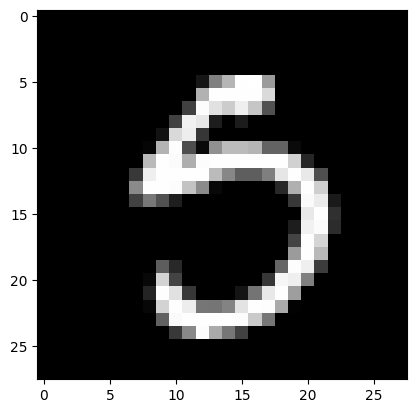

In [69]:
test_prediction(5, W1, b1, W2, b2)

In [72]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)


[8 7 7 6 8 6 0 1 9 3 1 5 3 8 3 9 9 7 3 2 6 0 7 1 7 8 3 8 6 7 5 1 3 4 9 4 8
 3 6 1 1 8 2 3 0 5 2 8 1 8 7 1 6 9 6 2 8 8 4 4 3 9 2 6 0 1 7 3 6 6 2 3 4 1
 1 0 5 3 8 7 9 7 3 6 8 9 3 1 1 2 2 5 1 3 6 5 4 7 6 3 8 1 9 2 6 8 3 9 9 3 2
 9 6 5 6 8 1 7 5 3 4 8 4 1 5 7 8 6 1 1 1 5 1 1 4 5 2 2 6 4 2 7 9 9 8 7 9 0
 4 4 5 5 1 6 3 4 0 1 4 5 5 9 9 7 2 4 4 1 3 7 7 1 9 8 6 9 3 7 7 9 6 0 7 1 9
 8 2 0 3 6 9 5 7 1 3 7 2 3 3 4 3 2 4 0 2 9 7 8 5 9 2 0 6 0 1 2 2 7 2 5 3 1
 1 8 5 3 0 9 0 7 1 7 5 1 0 6 9 1 8 8 4 8 6 0 1 7 6 9 2 8 5 8 4 9 3 0 2 1 8
 3 5 4 4 3 4 4 6 8 0 4 8 3 9 1 4 4 4 6 2 5 4 1 0 5 4 1 4 5 5 2 9 0 2 4 7 5
 8 3 2 6 7 2 0 1 9 5 0 3 1 0 3 9 6 3 8 8 7 9 9 6 2 2 9 6 4 5 6 2 3 1 4 3 9
 3 7 0 7 8 4 5 2 0 4 1 9 7 3 8 1 0 9 7 9 7 4 6 7 2 4 6 3 9 1 4 2 2 8 0 4 4
 2 3 6 8 7 9 1 2 6 6 8 2 7 2 7 8 4 9 8 4 5 8 1 4 2 2 9 8 6 4 6 7 9 9 7 4 1
 7 1 7 3 5 8 0 7 3 3 3 8 9 9 4 6 4 0 2 4 4 8 1 6 7 5 0 9 0 7 9 3 6 0 7 9 5
 9 3 0 4 3 4 0 6 7 0 3 6 5 2 7 5 9 4 5 3 3 2 2 1 9 5 3 0 2 0 5 7 9 1 5 8 8
 7 0 9 0 4 0 5 3 4 7 5 1 

0.9